# EFFECTS OF METAL OXIDES IN POSITANO'S TEMPERATURE 

***Author:*** Ariadna Recasens


## 1. OVERVIEW
This project explores the effect of metal oxides on the temperature of Positano to help the new mayor implement novel regulations. 


## 2. BUSINESS PROBLEM
The new mayor of Positano, a small Italian city, is worried about climate change and wants to understand whether metal oxides that are released from the city's industries impact the city's warming climate to introduce new regulations.

In this project, we will create a linear regression model to understand the effect of ten metal oxides on Positano's temperature to help the new mayor introduce new regulations to reduce climate change. 


## 3. DATA UNDERSTANDING
This project explores an [Air Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Air+Quality) containing 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. 

The device was located on the field in a significantly polluted area, at road level, within an Italian city. 

Data were recorded from March 2004 to February 2005 (one year), representing the longest freely available recordings of on field-deployed air quality chemical sensor device responses. 

Missing values are tagged with -200 value.


## 4. METHODS 
1. Data exploration: How do variables change over time?
1. Data exploration: how did the average of each variables change between 2014 and 2015?
1. Linear regression model: Iteration process to imporve the model by studying multicolinearity and interactions. The model has been validate using train and testing subset.

## 5. DATA MANIPULATIONS

### Importing necessary libraries

In [1]:
#data cleaning and stats
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#normality check
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf


#linear regression (sklearn and statsmodels)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

#model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.model_selection import cross_val_score



#### Let's open the data file

In [2]:

data = pd.read_csv('./data/AirQualityUCI.csv', delimiter=';')


## Data Understanding

Let's start exploring our data

In [3]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


We are going to rename the columns to make it easier to manipulate the data

In [5]:
data.columns=data.columns.str.replace('[(,),.]','')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         9357 non-null   object 
 1   Time         9357 non-null   object 
 2   COGT         9357 non-null   object 
 3   PT08S1CO     9357 non-null   float64
 4   NMHCGT       9357 non-null   float64
 5   C6H6GT       9357 non-null   object 
 6   PT08S2NMHC   9357 non-null   float64
 7   NOxGT        9357 non-null   float64
 8   PT08S3NOx    9357 non-null   float64
 9   NO2GT        9357 non-null   float64
 10  PT08S4NO2    9357 non-null   float64
 11  PT08S5O3     9357 non-null   float64
 12  T            9357 non-null   object 
 13  RH           9357 non-null   object 
 14  AH           9357 non-null   object 
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


Let's eliminate the columns that are not essential for our analysis.


In [7]:
data = data.drop(['Unnamed: 15'], axis=1)
data = data.drop(['Unnamed: 16'], axis=1)
data = data.drop(['Time'], axis=1)


data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        9357 non-null   object 
 1   COGT        9357 non-null   object 
 2   PT08S1CO    9357 non-null   float64
 3   NMHCGT      9357 non-null   float64
 4   C6H6GT      9357 non-null   object 
 5   PT08S2NMHC  9357 non-null   float64
 6   NOxGT       9357 non-null   float64
 7   PT08S3NOx   9357 non-null   float64
 8   NO2GT       9357 non-null   float64
 9   PT08S4NO2   9357 non-null   float64
 10  PT08S5O3    9357 non-null   float64
 11  T           9357 non-null   object 
 12  RH          9357 non-null   object 
 13  AH          9357 non-null   object 
dtypes: float64(8), object(6)
memory usage: 1.0+ MB


Now let's explore NaN values

In [8]:
#inspect for any columns with null values
data.isna().sum()

Date          114
COGT          114
PT08S1CO      114
NMHCGT        114
C6H6GT        114
PT08S2NMHC    114
NOxGT         114
PT08S3NOx     114
NO2GT         114
PT08S4NO2     114
PT08S5O3      114
T             114
RH            114
AH            114
dtype: int64

Let's deal with NaN data. From the data above, we know that there are 114 rows with NaN values. Since this correspond to a small percentage, we proceed to delete the rows that contain Nan values.

In [9]:
data = data.dropna()

As mentioned in the Dataset information, the missing values are tagged with -200 values. Let's explore that a bit further:

In [10]:
data['COGT'].value_counts()

-200    1592
1,4      279
1,6      275
1,5      273
1,1      262
        ... 
7,6        1
11,5       1
9,3        1
7          1
11,9       1
Name: COGT, Length: 104, dtype: int64

In [11]:
data['T'].value_counts()

-200    366
20,8     57
21,3     54
20,2     51
13,8     51
       ... 
-0,5      1
44,3      1
0,0       1
41,0      1
-1,9      1
Name: T, Length: 437, dtype: int64

In [12]:
#data['CO(GT)'].tail()
data.sort_values('COGT').head()


,Date,COGT,PT08S1CO,NMHCGT,C6H6GT,PT08S2NMHC,NOxGT,PT08S3NOx,NO2GT,PT08S4NO2,PT08S5O3,T,RH,AH
3501,03/08/2004,-200,1076.0,-200.0,"9,3",951.0,112.0,730.0,109.0,1675.0,704.0,"36,5","28,7","1,7256"
3301,26/07/2004,-200,1150.0,-200.0,"11,2",1020.0,180.0,686.0,116.0,1842.0,1169.0,"26,5","46,3","1,5768"
3302,26/07/2004,-200,1088.0,-200.0,"9,7",965.0,168.0,734.0,109.0,1744.0,1049.0,"27,9","42,7","1,5754"
3303,26/07/2004,-200,993.0,-200.0,"7,2",866.0,111.0,832.0,98.0,1637.0,823.0,"28,8","38,9","1,5184"
3304,26/07/2004,-200,962.0,-200.0,"6,8",849.0,111.0,861.0,97.0,1559.0,804.0,"31,7","31,5","1,4487"


To deal with these missing. values, we will replace them for the median of the columns.

In [13]:
for i in data.columns:
    if i == 'Date':
        continue
    else :
        data[i] = data[i].astype(str)
        data[i] = data[i].str.replace(",",".")
        data[i] = data[i].astype(str).astype(float)
        data[i] = data[i].replace(-200,data['COGT'].median())

Let's confirm that it has worked: 


In [14]:
data['T'].value_counts()

 1.5     368
 20.8     57
 21.3     54
 20.2     51
 13.8     51
        ... 
 0.5       1
 39.4      1
 40.7      1
 42.5      1
-1.4       1
Name: T, Length: 436, dtype: int64

In [15]:
data['COGT'].value_counts()

1.5     1956
1.0      305
1.4      279
1.6      275
1.1      262
        ... 
7.6        1
9.3        1
9.5        1
10.1       1
11.9       1
Name: COGT, Length: 96, dtype: int64

In [16]:
data['NMHCGT'].value_counts()

1.5      8443
66.0       14
40.0        9
29.0        9
88.0        8
         ... 
252.0       1
511.0       1
102.0       1
131.0       1
541.0       1
Name: NMHCGT, Length: 430, dtype: int64

Let's further explore the data with some plots. Let's see how the CO2 and T change over time:

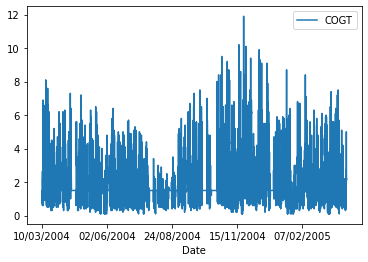

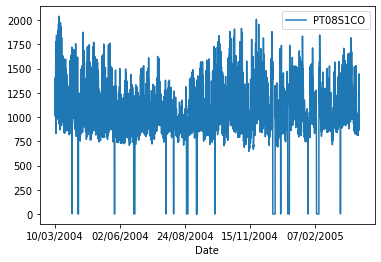

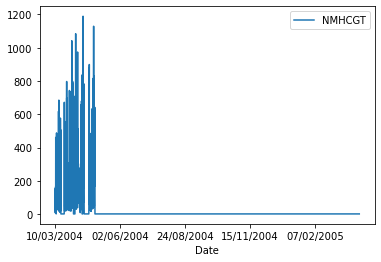

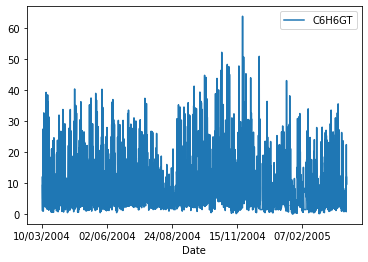

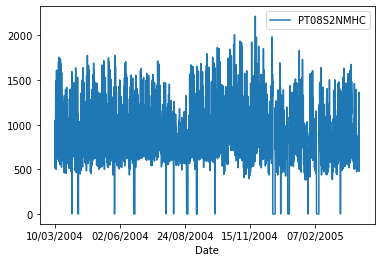

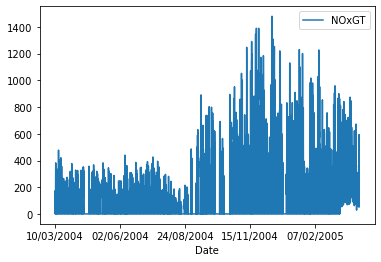

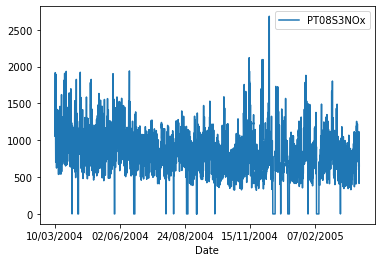

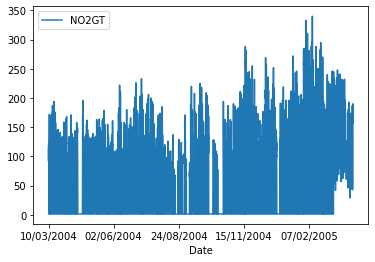

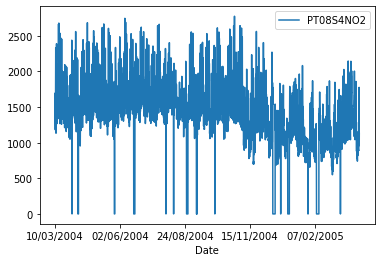

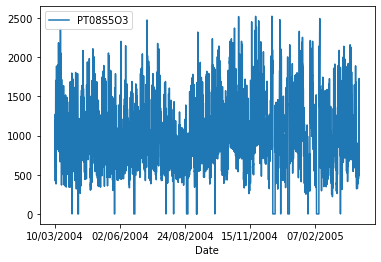

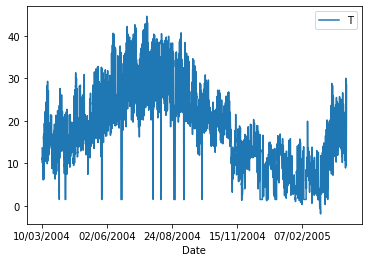

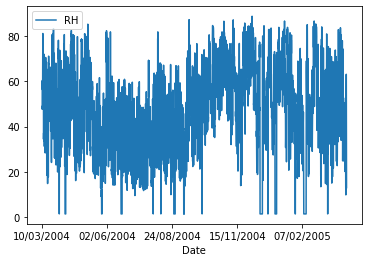

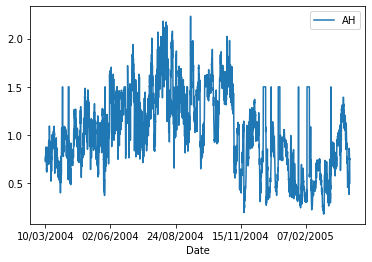

In [17]:


for i in data.columns:
    if i == 'Date':
        continue
    else :
        data.plot(x="Date", y=i)
        #plt.savefig('./images/hello.png', bbox_inches = "tight")
        plt.savefig('./images/'+str(i)+".png",dpi=300)
        plt.show



Let's further explore how the variables change with time

In [18]:

data.groupby(pd.PeriodIndex(data['Date'], freq="M"))['T'].mean()


Date
2004-01    21.750463
2004-02    23.225926
2004-03    17.661756
2004-04    19.131790
2004-05    21.646280
2004-06    23.858179
2004-07    27.158631
2004-08    23.947470
2004-09    21.507870
2004-10    19.988938
2004-11    14.775000
2004-12    11.726437
2005-01     6.834239
2005-02     7.366250
2005-03    15.118297
2005-04     7.380460
2005-05     8.229167
2005-06     9.166667
2005-07     7.565278
2005-08     8.184722
2005-09     8.427778
2005-10     8.695833
2005-11     8.583333
2005-12    11.122222
Freq: M, Name: T, dtype: float64

In [19]:
data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['T'].mean()


Date
2004    20.240605
2005     9.494393
Freq: A-DEC, Name: T, dtype: float64

To furhter explore the data, let's see how the mean of each of the variables change after 1 year. Are they increaseing?

In [20]:
a = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['COGT'].mean()
b = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['PT08S1CO'].mean()
c = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['NMHCGT'].mean()
d = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['C6H6GT'].mean()
e = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['PT08S2NMHC'].mean()
f = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['NOxGT'].mean()
g = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['PT08S3NOx'].mean()
h = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['NO2GT'].mean()
i = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['PT08S4NO2'].mean()
j = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['PT08S5O3'].mean()
k = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['T'].mean()
l = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['RH'].mean()
m = data.groupby(pd.PeriodIndex(data['Date'], freq="Y"))['AH'].mean()


In [21]:
columns = ['variable','average_2014','average_2015']

variables = pd.DataFrame(columns=columns)
def add_values(num_role, variable, dataset):
    variables.loc[num_role] = [variable, dataset[0], dataset[1]]

add_values(1, 'COGT', a)
add_values(2, 'PT08S1CO', b)
add_values(3, 'NMHCGT', c)
add_values(4, 'C6H6GT', d)
add_values(5, 'PT08S2NMHC', e)
add_values(6, 'NOxGT', f)
add_values(7, 'PT08S3NOx', g)
add_values(8, 'NO2GT', h)
add_values(9, 'PT08S4NO2', i)
add_values(10, 'PT08S5O3', j)
add_values(11, 'T', k)
add_values(12, 'RH', l)
add_values(13, 'AH', m)

variables

,variable,average_2014,average_2015
1,COGT,2.036723,2.030975
2,PT08S1CO,1061.597046,1041.919893
3,NMHCGT,29.435724,1.500000
4,C6H6GT,10.338383,7.877303
5,PT08S2NMHC,930.068214,815.172230
6,NOxGT,170.898312,308.375834
7,PT08S3NOx,828.916174,720.461949
8,NO2GT,79.611744,137.482198
9,PT08S4NO2,1502.120956,1074.207388
10,PT08S5O3,980.447117,990.885180


In [22]:
#Now we can eliminate the DAte variable, as it is not of our interst in the following analysis". 
We also delete Relative Humidty and A

data = data.drop('Date', axis=1)
data = data.drop('RH', axis=1)
data = data.drop('AH', axis=1)




## Data Modelling

Let's take a look of distributions of selected predictors after preliminary data preparation. 


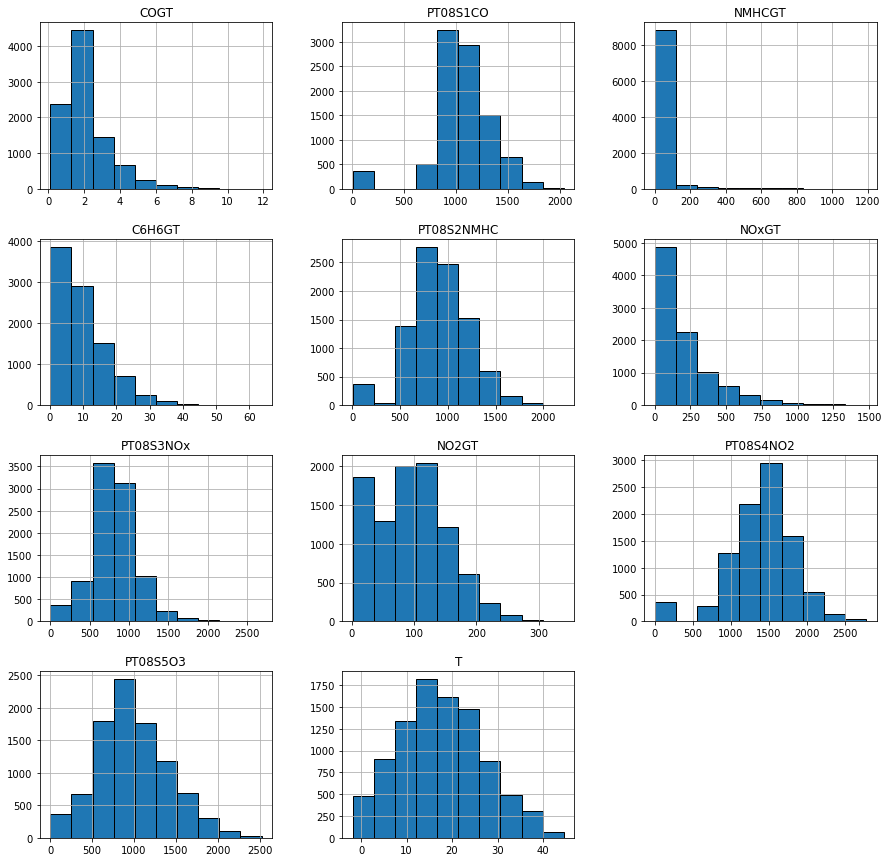

In [23]:
data.hist(figsize=(15,15), edgecolor = 'black');


From the graphs above, we can see that most of the variables display a normal distribution. But let's play a bit, and see if we can improve them with a logarithmic and normalization transformation.
Since we can't do the logarithm of negative values, let's first see which variables have negative values:


In [24]:
for i in data.columns:
    if i == 'Date':
        continue
    if data[i].min() <= 0:
        print(i) 
        
#data['T'].min() --> so we can't take 

T


Based on the above result, we will transform all variables but T

In [25]:
# log features
continuous = ['COGT','PT08S1CO','NMHCGT','C6H6GT','PT08S2NMHC','NOxGT','PT08S3NOx','NO2GT','PT08S4NO2','PT08S5O3']

# Log transform and normalize
data_cont = data[continuous]

# log features
log_names = [f'{column}_log' for column in data_cont.columns]
data_log = np.log(data_cont)
data_log.columns = log_names
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)


data_log_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COGT_log        9357 non-null   float64
 1   PT08S1CO_log    9357 non-null   float64
 2   NMHCGT_log      9357 non-null   float64
 3   C6H6GT_log      9357 non-null   float64
 4   PT08S2NMHC_log  9357 non-null   float64
 5   NOxGT_log       9357 non-null   float64
 6   PT08S3NOx_log   9357 non-null   float64
 7   NO2GT_log       9357 non-null   float64
 8   PT08S4NO2_log   9357 non-null   float64
 9   PT08S5O3_log    9357 non-null   float64
dtypes: float64(10)
memory usage: 804.1 KB


Let's see if the distribution improves after the transmoration (log + norm). From the graphs below, we obseve that doing this transfmoration signicantly worsen the normal distribtuion. AS such, we won't apply logarithm transformation to our dataset.

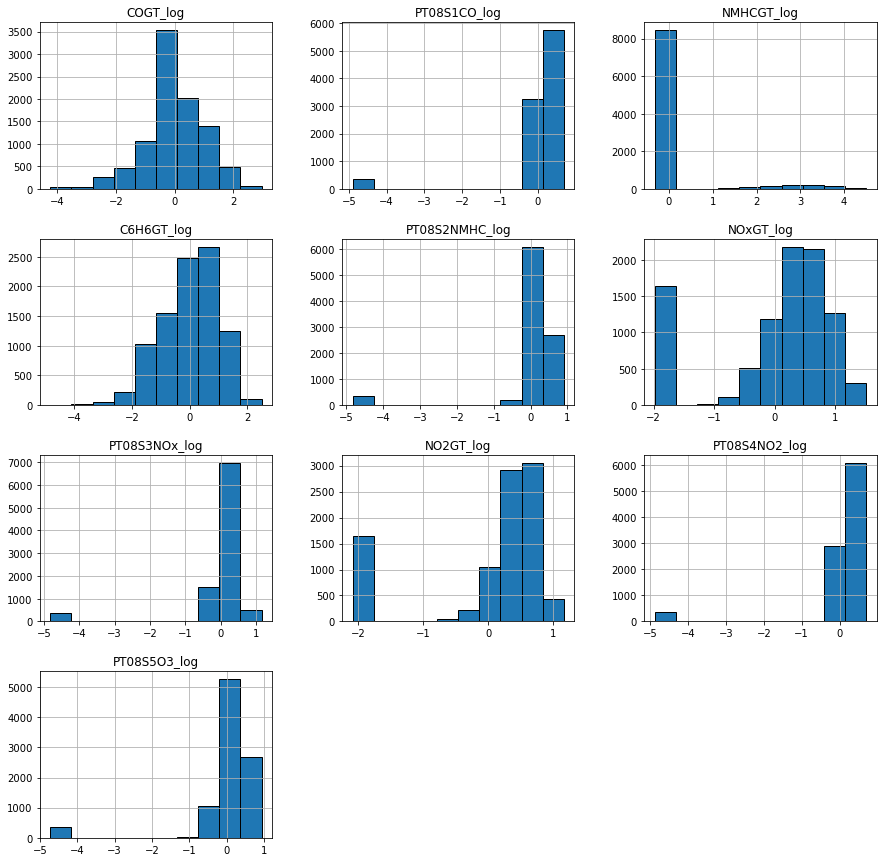

In [26]:
data_log_norm.hist(figsize=(15,15), edgecolor = 'black');


But let's see what happens if we normalize the data, without the logaritmic transformation. We can see from the graphs below that the distribution remains pretty normal, so we will use both the raw data and normalized data for furhter analysis and compare which one works better  

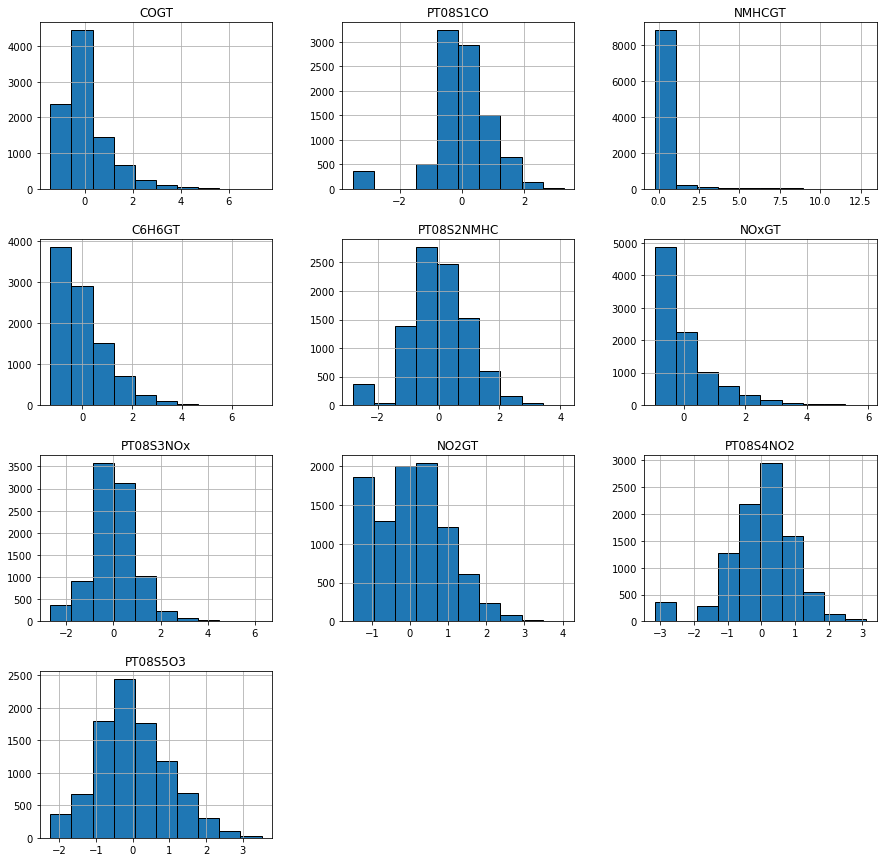

In [27]:
data_norm = data_cont.apply(normalize)
data_norm.hist(figsize=(15,15), edgecolor = 'black');



In [28]:
data2 = pd.concat([data['T'], data_norm], axis=1)

### Correlation visualization

Let's have a quick look to how variables correlate among each others. From the heatmap below, we can see that 5 variables are positively correlated with Temperature, and 7 negatively correlated with T.

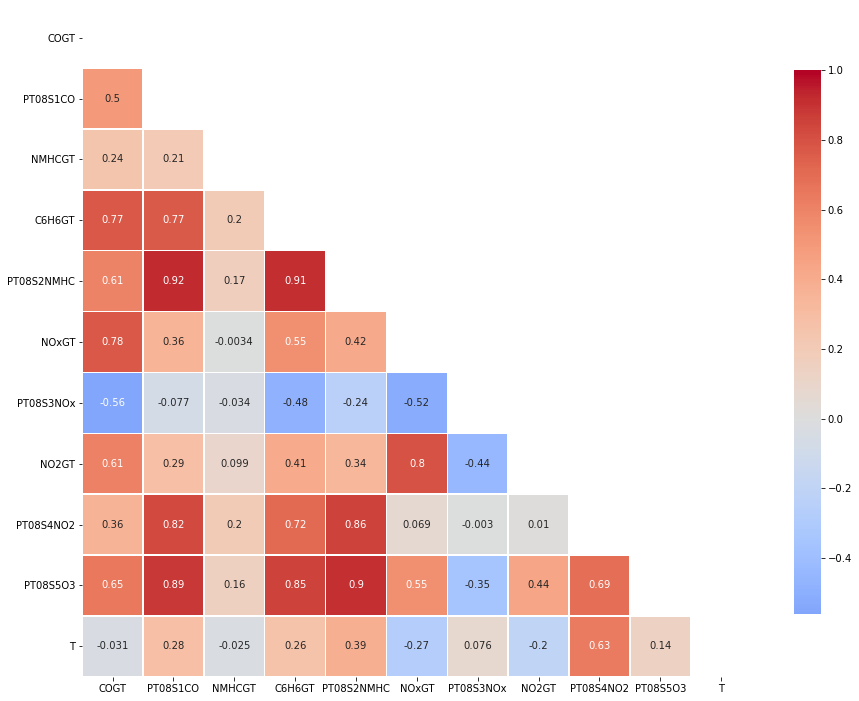

In [29]:
#visualize correlation using heatmap
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

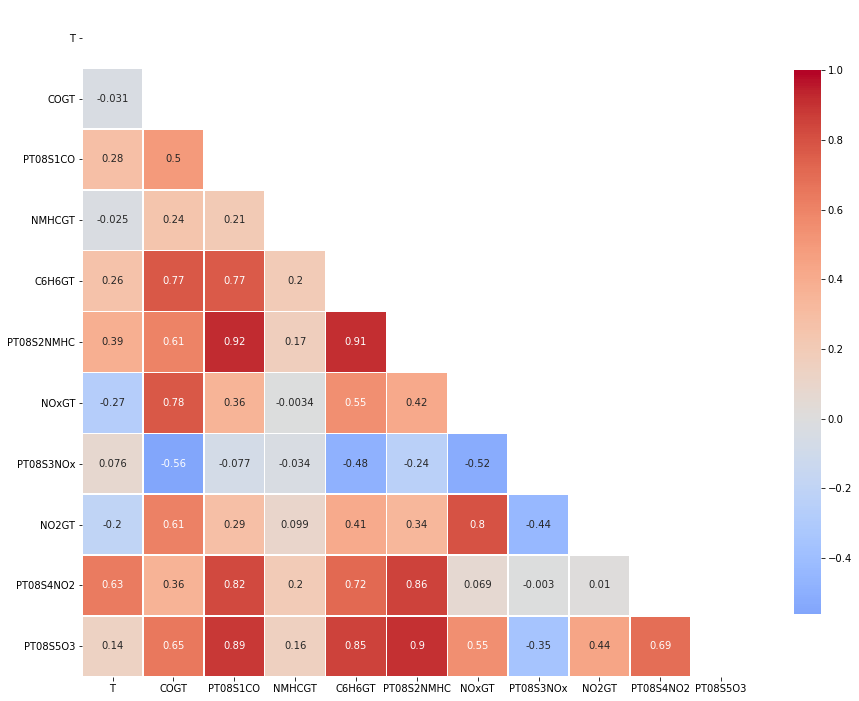

In [30]:
#visualize correlation using heatmap
corr = data2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

heatmap = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5})
fig = heatmap.get_figure()
fig.savefig("./images/heatmap.png") 

Let's do a first model using the raw data, and the normalized data.

#### Model with normalized data
The R-squared value of our model is 0.671, which means that 67,1% of the variablity in T can be explained by this model. 
6 variables significantly (p <0.05) and negatively (coef < 0) contribute to T, while 3 signifcnatly (p<0.05) and positviely (coef >0) contribute to Temperature. 
CO doesn't signfinicantly impact on T. 


In [35]:

X = data2.drop('T', axis=1)
y = data2['T']

import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     1907.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:07:51   Log-Likelihood:                -28890.
No. Observations:                9357   AIC:                         5.780e+04
Df Residuals:                    9346   BIC:                         5.788e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6600      0.055    321.833      0.000      17.552      17.768
COGT          -0.2380      0.129     -1.847      0.065      -0.491       0.015
PT08S1CO      -5.3335      0.201    -26.554      0.000      -5.727      -4.940
NMHCGT        -0.9766      0.064    -15.371      0.000      -1.101      -0.852
C6H6GT        -4.5562      0.232    -19.670      0.000      -5.010      -4.102
PT08S2NMHC     9.1389      0.318     28.754      0.000       8.516       9.762
NOxGT         -1.5913      0.136    -11.699      0.000      -1.858      -1.325
PT08S3NOx     -1.8433      0.085    -21.668      0.000      -2.010      -1.677
NO2GT          1.3338      0.097     13.696      0.000       1.143       1.525
PT08S4NO2      9.5212      0.144     65.998      0.000       9.238       9.804
PT08S5O3      -5.0349      0.171    -29.425      0.000      -5.370      -4.700
==============================================================================
Omnibus:                      354.012   Durbin-Watson:                   0.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.871
Skew:                           0.393   Prob(JB):                    1.40e-105
Kurtosis:                       3.789   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model with raw data
From the table below, we can see that the model is very similar to the one using normalizing data.
But unlike the previos model, this one has the condition number larger (1.43e+04), which might indicate that there are
strong multicollinearity or other numerical problems.
For this reason, we will proceed using the normalized data (or data2)

In [36]:

X1 = data.drop('T', axis=1)
y1 = data['T']

import statsmodels.api as sm
X1_int = sm.add_constant(X1)
model = sm.OLS(y,X1_int).fit()
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     1907.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:09:51   Log-Likelihood:                -28890.
No. Observations:                9357   AIC:                         5.780e+04
Df Residuals:                    9346   BIC:                         5.788e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5502      0.318      8.027      0.000       1.927       3.173
COGT          -0.1777      0.096     -1.847      0.065      -0.366       0.011
PT08S1CO      -0.0177      0.001    -26.554      0.000      -0.019      -0.016
NMHCGT        -0.0108      0.001    -15.371      0.000      -0.012      -0.009
C6H6GT        -0.6083      0.031    -19.670      0.000      -0.669      -0.548
PT08S2NMHC     0.0287      0.001     28.754      0.000       0.027       0.031
NOxGT         -0.0074      0.001    -11.699      0.000      -0.009      -0.006
PT08S3NOx     -0.0062      0.000    -21.668      0.000      -0.007      -0.006
NO2GT          0.0218      0.002     13.696      0.000       0.019       0.025
PT08S4NO2      0.0216      0.000     65.998      0.000       0.021       0.022
PT08S5O3      -0.0115      0.000    -29.425      0.000      -0.012      -0.011
==============================================================================
Omnibus:                      354.012   Durbin-Watson:                   0.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.871
Skew:                           0.393   Prob(JB):                    1.40e-105
Kurtosis:                       3.789   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

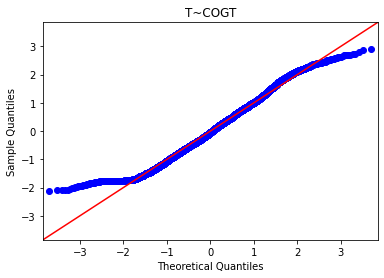

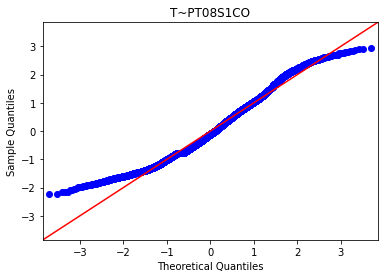

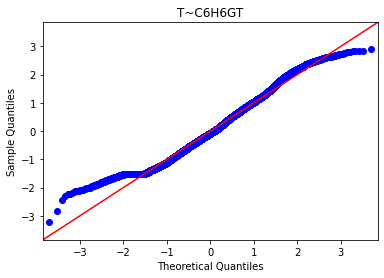

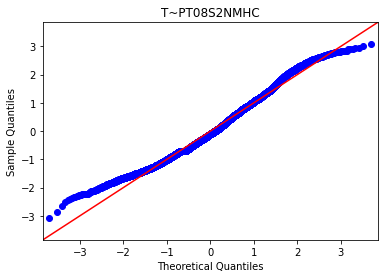

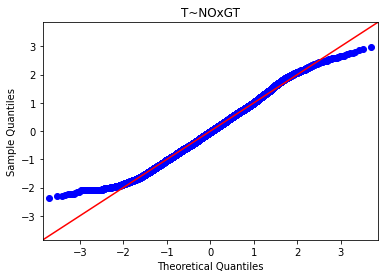

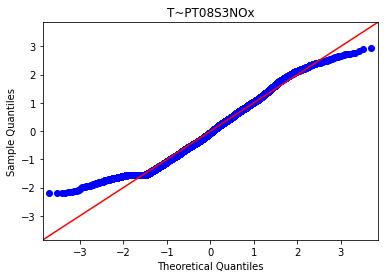

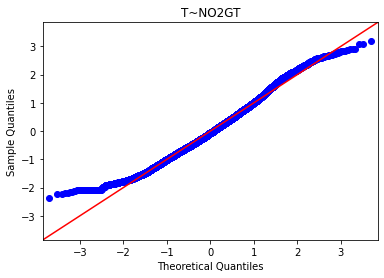

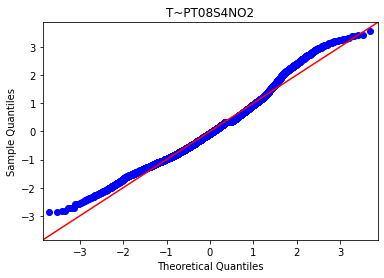

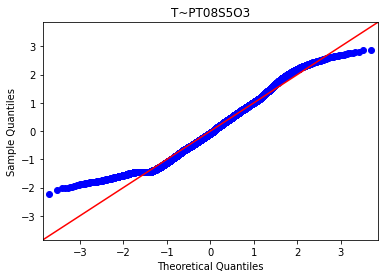

In [37]:
#Here we use QQ-plots to furhter confirm that our data follows a normal distribution. 

f_names = ['T~COGT', 'T~PT08S1CO', 'T~C6H6GT', 'T~PT08S2NMHC', 'T~NOxGT','T~PT08S3NOx','T~NO2GT','T~PT08S4NO2','T~PT08S5O3']

import warnings
warnings.filterwarnings('ignore')

for i in f_names:
    model = smf.ols(formula=i, data=data2).fit()
    resid = model.resid
    fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
    plt.title(i)
    fig.show();

To see if we can improve our model, we next explore multicolinearity in our model. 

In [38]:
data2.corr()
abs(data2.corr()) > 0.8

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df=data2.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace = True)
#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
df.columns = ['cc']
# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

df[(df.cc>.8) & (df.cc <1)]

,cc
pairs,
"(PT08S1CO, PT08S2NMHC)",0.922007
"(PT08S2NMHC, C6H6GT)",0.912973
"(PT08S5O3, PT08S2NMHC)",0.903005
"(PT08S1CO, PT08S5O3)",0.886844
"(PT08S2NMHC, PT08S4NO2)",0.855634
"(PT08S5O3, C6H6GT)",0.853297
"(PT08S4NO2, PT08S1CO)",0.823349


We explore the effect of deleting the variables that display a higher multicolinearity:

In [40]:
data3 = data2.drop(['PT08S2NMHC'], axis=1)
data3 = data2.drop(['PT08S5O3'], axis=1)
data3 = data2.drop(['PT08S1CO'], axis=1)

In [41]:
#data = data.drop('Date', axis=1)

X2 = data3.drop('T', axis=1)
y2 = data3['T']

import statsmodels.api as sm
X2_int = sm.add_constant(X2)
model = sm.OLS(y2,X2_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     1898.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:10:40   Log-Likelihood:                -29231.
No. Observations:                9357   AIC:                         5.848e+04
Df Residuals:                    9347   BIC:                         5.855e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6600      0.057    310.356      0.000      17.548      17.772
COGT          -0.2706      0.134     -2.025      0.043      -0.533      -0.009
NMHCGT        -1.3780      0.064    -21.534      0.000      -1.503      -1.253
C6H6GT        -2.3756      0.225    -10.577      0.000      -2.816      -1.935
PT08S2NMHC     4.9075      0.285     17.210      0.000       4.348       5.466
NOxGT         -1.9936      0.140    -14.223      0.000      -2.268      -1.719
PT08S3NOx     -2.3835      0.086    -27.825      0.000      -2.551      -2.216
NO2GT          1.4878      0.101     14.758      0.000       1.290       1.685
PT08S4NO2      8.8900      0.148     60.249      0.000       8.601       9.179
PT08S5O3      -7.3186      0.153    -47.710      0.000      -7.619      -7.018
==============================================================================
Omnibus:                      340.346   Durbin-Watson:                   0.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              480.855
Skew:                           0.371   Prob(JB):                    3.83e-105
Kurtosis:                       3.827   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that after deleting the variables with higher correlation we don't improve the model. In fact, we reduce R2 slightly. As such, we proceed without deleting any variables, so we can draw conclusions for more variables.

### Model Validation

Now let's validate our test using test and train substets:

In [42]:
from sklearn.model_selection import train_test_split

X = data2.drop('T', axis=1)
y = data2['T']

# Split the data into training and test sets (assign 20% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [43]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

27.81324174031177

In [45]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring=mse)
cv_20_results = cross_val_score(linreg, X, y, cv=20, scoring=mse)

cv_5_results.mean(), cv_10_results.mean(), cv_20_results.mean()

(38.553039744931525, 33.72430412091841, 31.218703140853428)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

7485 1872 7485 1872
Train Mean Squarred Error: 28.20605443760433
Test Mean Squarred Error: 27.97673766079869


From the data above, we can see that the model works pretty similar using Train and test data, which validates our model. 

### Interactions
Now let's try to improve our model studying interaction between variables:


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
baseline

0.6694309750438172

In [48]:
from itertools import combinations

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

interactions = []

feat_combinations = combinations(X.columns, 2)

data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0
Top interactions: [('PT08S1CO', 'PT08S5O3', 0.694), ('PT08S2NMHC', 'PT08S5O3', 0.688), ('NO2GT', 'PT08S5O3', 0.681)]


Let's re-do our model introducing these interactions:

In [49]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

X_interact = X.copy()
X_interact['PT08S1CO_PT08S5O3'] = X['PT08S1CO'] * X['PT08S5O3']
X_interact['PT08S2NMHC_PT08S5O3'] = X['PT08S2NMHC'] * X['PT08S5O3']
X_interact['NO2GT_PT08S5O3'] = X['NO2GT'] * X['PT08S5O3']

interact = np.mean(cross_val_score(regression, X_interact, y, scoring='r2', cv=crossvalidation))
interact

0.6985077040537814

If we run a new model using this interaction-dataset, we see that we improve the R-squared a little bit, being now 0.700, meaning that 70% of variability in T can be explained with our model.  

In [51]:

import statsmodels.api as sm
X_int2 = sm.add_constant(X_interact)
model = sm.OLS(y,X_int2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     1679.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:19:40   Log-Likelihood:                -28457.
No. Observations:                9357   AIC:                         5.694e+04
Df Residuals:                    9343   BIC:                         5.704e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.5141      0.165     87.800      0.000      14.190      14.838
COGT                   -0.4900      0.125     -3.916      0.000      -0.735      -0.245
PT08S1CO               -6.2496      0.197    -31.675      0.000      -6.636      -5.863
NMHCGT                 -1.1124      0.062    -17.831      0.000      -1.235      -0.990
C6H6GT                -16.8861      0.749    -22.536      0.000     -18.355     -15.417
PT08S2NMHC             23.8037      0.812     29.320      0.000      22.212      25.395
NOxGT                  -2.3611      0.134    -17.576      0.000      -2.624      -2.098
PT08S3NOx              -2.2015      0.104    -21.201      0.000      -2.405      -1.998
NO2GT                   1.6107      0.094     17.090      0.000       1.426       1.795
PT08S4NO2               9.3967      0.138     68.135      0.000       9.126       9.667
PT08S5O3               -6.4036      0.170    -37.726      0.000      -6.736      -6.071
PT08S1CO_PT08S5O3       2.3793      0.154     15.479      0.000       2.078       2.681
PT08S2NMHC_PT08S5O3     0.8977      0.239      3.759      0.000       0.430       1.366
NO2GT_PT08S5O3          0.5114      0.058      8.798      0.000       0.397       0.625
==============================================================================
Omnibus:                      271.113   Durbin-Watson:                   0.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              355.162
Skew:                           0.337   Prob(JB):                     7.54e-78
Kurtosis:                       3.676   Cond. No.                         61.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Further validation of the new interact model

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_interact, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

7485 1872 7485 1872
Train Mean Squarred Error: 25.794784659741882
Test Mean Squarred Error: 25.182691043345766


From the data above, we can conclude that our model works pretty well in both train and test substets.

Now let's see what are the variables that positively contribute to T, and which ones negatively contribute to T in our model: 

In [53]:
columns = ['index','coef']

coef_positive_table = pd.DataFrame(columns=columns)
coef_negative_table = pd.DataFrame(columns=columns)


for i, a in enumerate(model.params[:-3]): # I add [:-3] because I am removing the 3 columns with interactions
    if a > 0:
        coef_positive_table.loc[i] = [i,a]
    else:
        coef_negative_table.loc[i] = [i,a]

coef_positive_table     

,index,coef
0,0.0,14.514067
5,5.0,23.803690
8,8.0,1.610673
9,9.0,9.396746


In [54]:
coef_positive_table = coef_positive_table.iloc[1: , :]
coef_positive_table

,index,coef
5,5.0,23.803690
8,8.0,1.610673
9,9.0,9.396746


In [55]:
index_positive = coef_positive_table.index


#grade_analysis #data2?

positive_variables = []

for i in index_positive:
    positive_variables.append(data2.columns[i])

positive_variables

['PT08S2NMHC', 'NO2GT', 'PT08S4NO2']

In [56]:
coef_positive_table['name_variable'] = positive_variables
coef_positive_table

,index,coef,name_variable
5,5.0,23.803690,PT08S2NMHC
8,8.0,1.610673,NO2GT
9,9.0,9.396746,PT08S4NO2


In [57]:
index_negative = coef_negative_table.index


#grade_analysis #data2?
negative_variables = []

for i in index_negative:
    negative_variables.append(data2.columns[i])

negative_variables

['COGT', 'PT08S1CO', 'NMHCGT', 'C6H6GT', 'NOxGT', 'PT08S3NOx', 'PT08S5O3']

In [58]:
coef_negative_table['name_variable'] = negative_variables
coef_negative_table

,index,coef,name_variable
1,1.0,-0.489987,COGT
2,2.0,-6.249633,PT08S1CO
3,3.0,-1.112450,NMHCGT
4,4.0,-16.886120,C6H6GT
6,6.0,-2.361071,NOxGT
7,7.0,-2.201539,PT08S3NOx
10,10.0,-6.403627,PT08S5O3


## 6. CONCLUSIONS
* All the metal oxides studied in this model significantly affect T in Positano.
* Titania (PT08.S2), NO2 and tungsten oxide (nominally NO2 targeted) positively contribute to T raise (the more concentration of these oxides, the more Temperature), being Titania the one with the highest negative impact. 
* CO, tin oxide, Non-Metanic HydroCarbons, Benzene, indium oxide, and tungsten oxide (nominally NOx targeted) negatively contribute to T (the more concentration of these oxides, the less T), being Benzene the one with the highest positive impact. 


## 7. BUSINESS RECOMMENDATIONS
We observe a big drop in Temperature between 2014 and 2015, with the T average in 2014 of 20.2 C vs 9.4 C in 2015. This 10C difference could be an indicator that the T sensor was damaged. We recommend checking the Tempearture Sensor and repeating the study with new collected data.

In terms of regulation, since Titania is the one that contributes the most to Temperature increase, we recommend that the new regulations aim to reduce the emissions of Titania. 
